In [1]:
# IMPORTACIÓN DE LIBRERIAS NECESARIAS:

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

## Lectura y exploración inicial

In [2]:
# FUNCIÓN PARA LEER Y EXPLORAR DATASET.

def leer_y_explorar_df(ruta_fichero):

    # Lectura del fichero
    try:
        df = pd.read_csv(ruta_fichero)
        print(f" Fichero {ruta_fichero} cargado correctamente:\n")
        print("\nPRIMERAS 5 FILAS DEL DATAFRAME")
        display(df.head(5))
        
    except FileNotFoundError:
        print(f" ERROR: No se encontró el fichero '{df}' en la ruta '{ruta_fichero}'")
        return None
    
    except Exception as e:
        print(f" ERROR inesperado al leer el fichero: {e}")
        return None

    # Dimensiones del dataset
    print(f" DIMENSIONES: {df.shape[0]} filas y {df.shape[1]} columnas\n")
    
    # Info general 
    print(" INFORMACIÓN GENERAL")
    df.info()
    
    # Sumatorio de valores nulos por columna
    print("\n VALORES NULOS POR COLUMNA")
    display(df.isnull().sum())
    
    # Sumatorio de filas duplicadas
    print("\n FILAS DUPLICADAS")
    print(f"Número de filas duplicadas: {df.duplicated().sum()}")

    # Principales estadísticas de las variables
    if df.select_dtypes(include='number').shape[1]:
        print("\nESTADÍSTICAS NUMÉRICAS:")
        display(df.describe().T)
    else:
        print("\n ESTADÍSTICAS NUMÉRICAS: No existen variables numéricas.")
    
    
    if df.select_dtypes(include='object').shape[1]:
        print("\nESTADÍSTICAS CATEGÓRICAS:")
        display(df.describe(include='object').T)
    else:
        print("\n ESTADÍSTICAS CATEGÓRICAS: No existen variables categóricas.")

    return df


In [3]:
# LECTURA Y EXPLORACIÓN DEL DATASET
df_emp = leer_y_explorar_df("hr.csv")

 Fichero hr.csv cargado correctamente:


PRIMERAS 5 FILAS DEL DATAFRAME


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,sALES eXECUTIVE,4.0,Single,5993.0,19479,8,Y,Yes,11,3,1,80.0,0,8,0.0,1,6,4,0,5.0
1,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,rESEARCH sCIENTIST,2.0,Married,5130.0,24907,1,Y,No,23,4,4,NaN,1,10,3.0,3,10,7,1,7.0
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,lABORATORY tECHNICIAN,3.0,Single,2090.0,2396,6,Y,Yes,15,3,2,NaN,0,7,3.0,3,0,0,0,0.0
3,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,rESEARCH sCIENTIST,3.0,Married,2909.0,23159,1,Y,Yes,11,3,3,80.0,0,8,3.0,3,8,7,3,0.0
4,27.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,lABORATORY tECHNICIAN,2.0,Married,3468.0,16632,9,Y,No,12,3,4,80.0,1,6,3.0,3,2,2,2,2.0


 DIMENSIONES: 1474 filas y 35 columnas

 INFORMACIÓN GENERAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1401 non-null   float64
 1   Attrition                 1474 non-null   object 
 2   BusinessTravel            1357 non-null   object 
 3   DailyRate                 1474 non-null   int64  
 4   Department                1445 non-null   object 
 5   DistanceFromHome          1474 non-null   int64  
 6   Education                 1474 non-null   int64  
 7   EducationField            1416 non-null   object 
 8   EmployeeCount             1474 non-null   int64  
 9   EmployeeNumber            1474 non-null   int64  
 10  EnvironmentSatisfaction   1474 non-null   int64  
 11  Gender                    1474 non-null   object 
 12  HourlyRate                1474 non-null   int64  
 13  Jo

Age                          73
Attrition                     0
BusinessTravel              117
DailyRate                     0
Department                   29
DistanceFromHome              0
Education                     0
EducationField               58
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction              29
MaritalStatus               132
MonthlyIncome                14
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                     44
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours               164
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear        88
WorkLifeBalance               0
YearsAtC


 FILAS DUPLICADAS
Número de filas duplicadas: 4

ESTADÍSTICAS NUMÉRICAS:


,count,mean,std,min,25%,50%,75%,max
Age,1401.0,36.944325,9.105009,18.0,30.00,36.0,43.00,60.0
DailyRate,1474.0,802.702171,403.539530,102.0,465.00,803.0,1157.00,1499.0
DistanceFromHome,1474.0,9.199457,8.104266,1.0,2.00,7.0,14.00,29.0
Education,1474.0,2.911126,1.024267,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1474.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1474.0,1024.471506,602.421193,1.0,488.75,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1474.0,2.723881,1.093280,1.0,2.00,3.0,4.00,4.0
HourlyRate,1474.0,65.887381,20.310444,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1474.0,2.729986,0.712861,1.0,2.00,3.0,3.00,4.0
JobLevel,1474.0,2.063772,1.106055,1.0,1.00,2.0,3.00,5.0



ESTADÍSTICAS CATEGÓRICAS:


,count,unique,top,freq
Attrition,1474,2,No,1236
BusinessTravel,1357,3,Travel_Rarely,955
Department,1445,3,Research & Development,941
EducationField,1416,6,Life Sciences,582
Gender,1474,2,Male,885
JobRole,1474,9,sALES eXECUTIVE,327
MaritalStatus,1342,4,Married,604
Over18,1474,1,Y,1474
OverTime,1430,2,No,1025


# Gestión de duplicados

In [4]:
# MOSTRAR CONTENIDO DE FILAS DUPLICADAS

df_emp[df_emp.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1470,28.0,No,Travel_Rarely,866,Sales,5,3,Medical,1,1469,4,Male,84,3,2,sALES eXECUTIVE,1.0,Single,8463.0,23490,0,Y,No,18,3,4,NaN,0,6,4.0,3,5,4,1,NaN
1471,53.0,No,Travel_Rarely,1084,Research & Development,13,2,Medical,1,250,4,Female,57,4,2,mANUFACTURING dIRECTOR,1.0,Divorced,4450.0,26250,1,Y,No,11,3,3,NaN,2,5,3.0,3,4,2,1,3.0
1472,24.0,Yes,Travel_Rarely,240,Human Resources,22,1,Human Resources,1,1714,4,Male,58,1,1,hUMAN rESOURCES,3.0,Married,1555.0,11585,1,Y,No,11,3,3,80.0,1,1,2.0,3,1,0,0,0.0
1473,45.0,No,Travel_Rarely,1339,Research & Development,7,3,Life Sciences,1,86,2,Male,59,3,3,rESEARCH sCIENTIST,1.0,Divorced,9724.0,18787,2,Y,No,17,3,3,NaN,1,25,2.0,3,1,0,0,0.0


In [5]:
# Muestro cúantos valores únicos de EmployeeNumber(identificador único del empleado) hay
df_emp['EmployeeNumber'].nunique() # me muestra que hay 1470 EmployeeNumber por lo que hay 4 duplicados.

1470

In [6]:
# Muestro filas duplicadas (incluida la original) para comprobar qué columnas se repiten.

df_emp[df_emp['EmployeeNumber'].duplicated(keep=False)].sort_values('EmployeeNumber')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
67,45.0,No,Travel_Rarely,1339,Research & Development,7,3,Life Sciences,1,86,2,Male,59,3,3,rESEARCH sCIENTIST,1.0,Divorced,9724.0,18787,2,Y,No,17,3,3,NaN,1,25,2.0,3,1,0,0,0.0
1473,45.0,No,Travel_Rarely,1339,Research & Development,7,3,Life Sciences,1,86,2,Male,59,3,3,rESEARCH sCIENTIST,1.0,Divorced,9724.0,18787,2,Y,No,17,3,3,NaN,1,25,2.0,3,1,0,0,0.0
1471,53.0,No,Travel_Rarely,1084,Research & Development,13,2,Medical,1,250,4,Female,57,4,2,mANUFACTURING dIRECTOR,1.0,Divorced,4450.0,26250,1,Y,No,11,3,3,NaN,2,5,3.0,3,4,2,1,3.0
184,53.0,No,Travel_Rarely,1084,Research & Development,13,2,Medical,1,250,4,Female,57,4,2,mANUFACTURING dIRECTOR,1.0,Divorced,4450.0,26250,1,Y,No,11,3,3,NaN,2,5,3.0,3,4,2,1,3.0
1470,28.0,No,Travel_Rarely,866,Sales,5,3,Medical,1,1469,4,Male,84,3,2,sALES eXECUTIVE,1.0,Single,8463.0,23490,0,Y,No,18,3,4,NaN,0,6,4.0,3,5,4,1,NaN
1041,28.0,No,Travel_Rarely,866,Sales,5,3,Medical,1,1469,4,Male,84,3,2,sALES eXECUTIVE,1.0,Single,8463.0,23490,0,Y,No,18,3,4,NaN,0,6,4.0,3,5,4,1,NaN
1222,24.0,Yes,Travel_Rarely,240,Human Resources,22,1,Human Resources,1,1714,4,Male,58,1,1,hUMAN rESOURCES,3.0,Married,1555.0,11585,1,Y,No,11,3,3,80.0,1,1,2.0,3,1,0,0,0.0
1472,24.0,Yes,Travel_Rarely,240,Human Resources,22,1,Human Resources,1,1714,4,Male,58,1,1,hUMAN rESOURCES,3.0,Married,1555.0,11585,1,Y,No,11,3,3,80.0,1,1,2.0,3,1,0,0,0.0


In [9]:
# Filas duplicadas por EmployeeNumber, se duplica la info por lo que decido eliminarlas.
# Elimino duplicados dejando el que aparece por primera vez
df_emp = df_emp.drop_duplicates(subset='EmployeeNumber', keep='first')

# Comprobación que se han eliminado correctamente.
print(f" Filas duplicadas en df_emp:{df_emp.duplicated().sum()}")
print(f" Número de filas de df_emp: {df_emp.shape[0]}")

 Filas duplicadas en df_emp:0
 Número de filas de df_emp: 1470


- Cada fila es un empleado.

He eliminado duplicados que eran filas exactas, el mismo numero de empleado

Hay algunas columnas que se pueden eliminar creo:
-EmployeeCount, no aporta info 
-Over18, para ver los empleados que tienen más de 18 años y todos tienen más de 18
-StandardHours, todos los empleados trabajan las mismas horas.

Hay otras columnas que parece que tiene una info casi igual, podriamos ver si eliminar alguna para no tener muchas columnas que nos aporten
casi la misma info
-DailyRate, tarifa diaria
-HourlyRate,tarifa por hora
-MonthRate,tarifa mensual estimada
-MonthlyIncome, ingresos mensuales estimados. Creo q esta es con la podriamos quedarnos.

# Vamos a gestionar los nulos sacando medias, medianas o sustituyendo por el valor "unknown" en cada caso.

Para garantizar la calidad de los datos antes del análisis, tratamos los valores nulos siguiendo criterios sencillos y coherentes con el negocio. En las variables numéricas clave (como edad, ingresos mensuales, satisfacción en el trabajo, número de formaciones y años con el manager) imputamos los NaN usando la mediana, ya que es una medida robusta frente a valores extremos. En el caso de StandardHours, utilizamos el valor más frecuente (la moda), asumiendo que las horas estándar de trabajo son comunes para la mayoría de empleados. Para las variables categóricas (BusinessTravel, Department, EducationField y MaritalStatus) sustituimos los valores faltantes por la categoría “Unknown”, de forma que no perdemos registros y podemos identificar claramente aquellos casos en los que la información no está disponible.

In [21]:
def imputar_nulos(df):
    # Numéricas clave: mediana (solo si la columna existe)
    for col in ['Age', 'MonthlyIncome', 'JobSatisfaction',
                'TrainingTimesLastYear', 'YearsWithCurrManager']:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())

    # StandardHours: modo (valor más frecuente), si existe
    if 'StandardHours' in df.columns:
        df['StandardHours'] = df['StandardHours'].fillna(df['StandardHours'].mode()[0])

    # OverTime: categoría 'Unknown' (si existe)
    if 'OverTime' in df.columns:
        if str(df['OverTime'].dtype) == 'category':
            df['OverTime'] = df['OverTime'].cat.add_categories('Unknown')
        df['OverTime'] = df['OverTime'].fillna('Unknown')

    # Categóricas: rellenamos con 'Unknown' si existen
    for col in ['BusinessTravel', 'Department', 'EducationField', 'MaritalStatus']:
        if col in df.columns:
            df[col] = df[col].fillna('Unknown')

    return df

# Aplicar la función
df_emp = imputar_nulos(df_emp)
df_emp.head()



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_flag,AgeGroup
0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993.0,19479,8,Yes,11,3,1,0,8,0.0,1,6,4,0,5.0,1,40-50
1,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130.0,24907,1,No,23,4,4,1,10,3.0,3,10,7,1,7.0,0,40-50
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090.0,2396,6,Yes,15,3,2,0,7,3.0,3,0,0,0,0.0,1,30-40
3,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909.0,23159,1,Yes,11,3,3,0,8,3.0,3,8,7,3,0.0,0,30-40
4,27.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468.0,16632,9,No,12,3,4,1,6,3.0,3,2,2,2,2.0,0,<30


A continuacion vamos a hacer limpieza de las variables categoricas para que no haya errores debido a las mayusculas/ minusculas o espacios en blanco. Para ello estandarizamos con un formato Title Case (primera letra mayuscula) y eliminado espacios adicionales.

Estandarizamos nombres de departamento (Department), área de estudios (EducationField), rol (JobRole) y frecuencia de viajes (BusinessTravel).

Hacemos lo mismo con Attrition, OverTime y MaritalStatus para que todas las categorías queden homogéneas (por ejemplo “Sales Executive” en lugar de “sALES eXECUTIVE”). Esto facilita mucho el análisis posterior y evita que un mismo concepto aparezca como categorías distintas en tablas y gráficas.

In [24]:
def imputar_nulos(df):
    # Numéricas clave: mediana (solo si la columna existe)
    for col in ['Age', 'MonthlyIncome', 'JobSatisfaction',
                'TrainingTimesLastYear', 'YearsWithCurrManager']:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())

    # StandardHours: modo (valor más frecuente), si existe
    if 'StandardHours' in df.columns:
        df['StandardHours'] = df['StandardHours'].fillna(df['StandardHours'].mode()[0])

    # OverTime: rellenar nulos con 'Unknown' sin tocar categorías aquí
    if 'OverTime' in df.columns:
        df['OverTime'] = df['OverTime'].fillna('Unknown')

    # Categóricas: rellenamos con 'Unknown' si existen
    for col in ['BusinessTravel', 'Department', 'EducationField', 'MaritalStatus']:
        if col in df.columns:
            df[col] = df[col].fillna('Unknown')

    return df


def limpiar_categoricas(df):
    # Columnas que queremos poner en Title Case si existen
    cols_title = ['Department', 'EducationField', 'JobRole', 'BusinessTravel']
    for c in cols_title:
        if c in df.columns:
            df[c] = df[c].astype(str).str.strip().str.title()

    # Attrition
    if 'Attrition' in df.columns:
        df['Attrition'] = df['Attrition'].astype(str).str.strip().str.title()

    # OverTime: aquí sí tratamos categorías, comprobando antes
    if 'OverTime' in df.columns:
        if str(df['OverTime'].dtype) == 'category':
            # Añadimos 'Unknown' solo si no está
            if 'Unknown' not in df['OverTime'].cat.categories:
                df['OverTime'] = df['OverTime'].cat.add_categories(['Unknown'])
        df['OverTime'] = df['OverTime'].astype(str).str.strip().str.title()

    # MaritalStatus
    if 'MaritalStatus' in df.columns:
        df['MaritalStatus'] = df['MaritalStatus'].astype(str).str.strip().str.title()

    return df


# Flujo completo
df_emp = imputar_nulos(df_emp)
df_emp = limpiar_categoricas(df_emp)
df_emp.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_flag,AgeGroup
0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993.0,19479,8,Yes,11,3,1,0,8,0.0,1,6,4,0,5.0,1,40-50
1,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130.0,24907,1,No,23,4,4,1,10,3.0,3,10,7,1,7.0,0,40-50
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090.0,2396,6,Yes,15,3,2,0,7,3.0,3,0,0,0,0.0,1,30-40
3,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909.0,23159,1,Yes,11,3,3,0,8,3.0,3,8,7,3,0.0,0,30-40
4,27.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468.0,16632,9,No,12,3,4,1,6,3.0,3,2,2,2,2.0,0,<30


Y tratamos variables derivadas clave para el análisis que queremos hacer como serán la edad y la rotacion.

Transformamos la variable Attrition (Yes/No) en un indicador numérico Attrition_flag (1 si el empleado ha dejado la empresa, 0 en caso contrario), lo que simplifica el cálculo de proporciones y futuros modelos. 

Además, agrupamos la edad en rangos (AgeGroup) como <30, 30-40, 40-50 y >=50. Estos grupos permiten visualizar de forma más clara cómo varía la rotación y la satisfacción entre distintos segmentos de empleados, en lugar de trabajar con valores de edad individuales.

In [26]:
# 1) Imputar nulos
df_emp = imputar_nulos(df_emp)

# 2) Limpiar categóricas (Title Case, espacios, etc.)
df_emp = limpiar_categoricas(df_emp)

# 3) Crear variables derivadas
def crear_variables_derivadas(df):
    # Flag numérico de rotación
    df['Attrition_flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

    # Grupos de edad para análisis y visualización
    bins = [0, 30, 40, 50, 100]
    labels = ['<30', '30-40', '40-50', '>=50']
    df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

    return df

df_emp = crear_variables_derivadas(df_emp)
df_emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_flag,AgeGroup
0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993.0,19479,8,Yes,11,3,1,0,8,0.0,1,6,4,0,5.0,1,40-50
1,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130.0,24907,1,No,23,4,4,1,10,3.0,3,10,7,1,7.0,0,40-50
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090.0,2396,6,Yes,15,3,2,0,7,3.0,3,0,0,0,0.0,1,30-40
3,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909.0,23159,1,Yes,11,3,3,0,8,3.0,3,8,7,3,0.0,0,30-40
4,27.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468.0,16632,9,No,12,3,4,1,6,3.0,3,2,2,2,2.0,0,<30


Una vez tratada la falta de datos y creadas las nuevas variables, ajustamos los tipos de las columnas para que representen mejor su naturaleza. 

Las variables de satisfacción (EnvironmentSatisfaction, JobSatisfaction, RelationshipSatisfaction y WorkLifeBalance) y las puntuaciones de implicación y rendimiento (JobInvolvement, PerformanceRating) se convierten a enteros, ya que son escalas discretas. 

Las principales variables categóricas (Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, OverTime y AgeGroup) se transforman al tipo category, lo que facilita su manejo en análisis estadísticos y mejora el rendimiento. 

Además, eliminamos columnas poco informativas como EmployeeCount y Over18, y, en caso de que StandardHours tenga un único valor para todos los empleados, también la descartamos al no aportar variabilidad al análisis.

In [27]:
def ajustar_tipos_y_columnas(df):
    # 1. Variables de satisfacción como enteros (escalas discretas)
    sat_cols = ['EnvironmentSatisfaction', 'JobSatisfaction',
                'RelationshipSatisfaction', 'WorkLifeBalance']
    for col in sat_cols:
        if col in df.columns:
            df[col] = df[col].astype(int)

    # 2. Otras variables ordinales/ratings a int
    rating_cols = ['JobInvolvement', 'PerformanceRating']
    for col in rating_cols:
        if col in df.columns:
            df[col] = df[col].astype(int)

    # 3. Categóricas a 'category'
    cat_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField',
                'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'AgeGroup']
    for c in cat_cols:
        if c in df.columns:
            df[c] = df[c].astype('category')

    # 4. Eliminar columnas poco informativas si existen
    cols_drop = []
    for col in ['EmployeeCount', 'Over18']:
        if col in df.columns:
            cols_drop.append(col)

    if 'StandardHours' in df.columns and df['StandardHours'].nunique() == 1:
        cols_drop.append('StandardHours')

    if cols_drop:
        df = df.drop(columns=cols_drop)

    return df

df_emp = ajustar_tipos_y_columnas(df_emp)
df_emp.info()
# REVISIÓN FINAL DEL DATAFRAME TRATADO


<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   float64 
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   EmployeeNumber            1470 non-null   int64   
 9   EnvironmentSatisfaction   1470 non-null   int64   
 10  Gender                    1470 non-null   category
 11  HourlyRate                1470 non-null   int64   
 12  JobInvolvement            1470 non-null   int64   
 13  JobLevel                  1470 non-null   int64   
 1

## DATASET LIMPIO..................COMENZAMOS LAS METRICAS

Estas métricas nos ayudaran a comprobar si los empleados que abandonan la empresa presentan niveles de satisfacción inferiores o no, ya que planteamos la hipótesis de que la satisfacción laboral es un factor relevante en la retención de personal.

In [28]:
# 1. Tasa global de rotación
attrition_rate = df_emp['Attrition_flag'].mean()

# 2. Rotación por grupo de edad
attrition_by_agegroup = df_emp.groupby('AgeGroup')['Attrition_flag'].mean().sort_index()

# 3. Rotación por departamento
attrition_by_dept = df_emp.groupby('Department')['Attrition_flag'].mean().sort_values(ascending=False)

# 4. Rotación por OverTime
attrition_by_overtime = df_emp.groupby('OverTime')['Attrition_flag'].mean()

# 5. Satisfacción media por Attrition
job_sat_by_attrition = df_emp.groupby('Attrition')['JobSatisfaction'].mean()
env_sat_by_attrition = df_emp.groupby('Attrition')['EnvironmentSatisfaction'].mean()
wlb_by_attrition = df_emp.groupby('Attrition')['WorkLifeBalance'].mean()

# obtenemos la tasa global de rotación como la media de Attrition_flag, 
# que indica qué proporción de empleados abandona la compañía
print("Tasa global de rotación:", round(attrition_rate, 3))

#analizamos la rotación media por grupo de edad (AgeGroup), 
#lo que permite identificar si existen segmentos generacionales con mayor probabilidad de salida
print("\nRotación por grupo de edad:")
print(attrition_by_agegroup)

#También calculamos la tasa de rotación por departamento (Department) 
# y según la realización de horas extra (OverTime), para detectar áreas o condiciones de trabajo 
# especialmente sensibles en términos de fuga de talento.
print("\nRotación por departamento:")
print(attrition_by_dept)

print("\nRotación según OverTime:")
print(attrition_by_overtime)

#comparamos los niveles medios de satisfacción en el trabajo entre empleados que se quedan y los que se marchan
print("\nJobSatisfaction media por Attrition:")
print(job_sat_by_attrition)

# satisfacción con el entorno laboral entre empleados que se quedan y los que se marchan
print("\nEnvironmentSatisfaction media por Attrition:")
print(env_sat_by_attrition)

#equilibrio vida‑trabajo entre empleados que se quedan y los que se marchan
print("\nWorkLifeBalance medio por Attrition:")
print(wlb_by_attrition)


Tasa global de rotación: 0.161

Rotación por grupo de edad:
AgeGroup
<30      0.280130
30-40    0.145427
40-50    0.095808
>=50     0.135802
Name: Attrition_flag, dtype: float64

Rotación por departamento:
Department
Unknown                   0.344828
Sales                     0.202733
Human Resources           0.190476
Research & Development    0.134185
Name: Attrition_flag, dtype: float64

Rotación según OverTime:
OverTime
No         0.101861
Unknown    0.181818
Yes        0.308642
Name: Attrition_flag, dtype: float64

JobSatisfaction media por Attrition:
Attrition
No     2.786699
Yes    2.481013
Name: JobSatisfaction, dtype: float64

EnvironmentSatisfaction media por Attrition:
Attrition
No     2.771290
Yes    2.464135
Name: EnvironmentSatisfaction, dtype: float64

WorkLifeBalance medio por Attrition:
Attrition
No     2.781022
Yes    2.658228
Name: WorkLifeBalance, dtype: float64


# VISUALIZACION............

In [30]:
#Importamos librerías para visualización

import seaborn as sns
import matplotlib.pyplot as plt

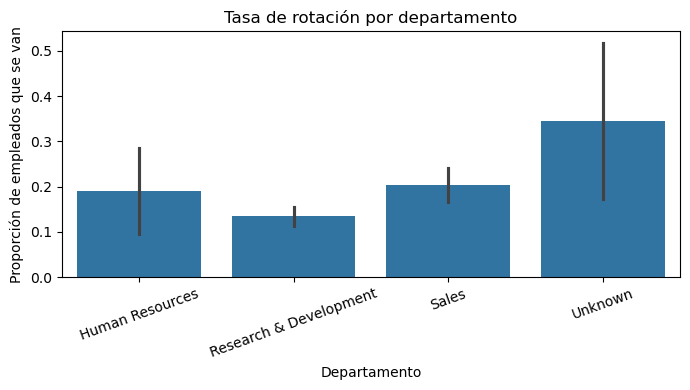

In [31]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=df_emp,
    x='Department',
    y='Attrition_flag',
    estimator='mean'
)
plt.title('Tasa de rotación por departamento')
plt.xlabel('Departamento')
plt.ylabel('Proporción de empleados que se van')
plt.xticks(rotation=20)
plt.tight_layout()
